In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Load the training and testing datasets from CSV files 
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

print(train_data.shape)
print(test_data.shape)

# Separate features (pixel values) and labels
x_train = train_data.iloc[:, 1:].values  
y_train = train_data.iloc[:, 0].values   
x_test = test_data.iloc[:, 1:].values    
y_test = test_data.iloc[:, 0].values     


x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


#x_train = x_train.reshape((x_train.shape[0], 28 * 28))
#x_test = x_test.reshape((x_test.shape[0], 28 * 28))


#y_train = to_categorical(y_train, 10)
#y_test = to_categorical(y_test, 10)

(60000, 785)
(10000, 785)


In [3]:
# Define the baseline model
def create_baseline_model():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile the model
baseline_model = create_baseline_model()
baseline_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
baseline_history = baseline_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8079 - loss: 0.6641 - val_accuracy: 0.9513 - val_loss: 0.1687
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9533 - loss: 0.1583 - val_accuracy: 0.9605 - val_loss: 0.1315
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9676 - loss: 0.1092 - val_accuracy: 0.9690 - val_loss: 0.1064
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9773 - loss: 0.0789 - val_accuracy: 0.9714 - val_loss: 0.0951
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9827 - loss: 0.0588 - val_accuracy: 0.9734 - val_loss: 0.0924
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9860 - loss: 0.0461 - val_accuracy: 0.9749 - val_loss: 0.0873
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9899 - loss: 0.0361 - val_accuracy: 0.9732 - val_loss: 0.0907
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9915 - loss: 0.0301 - val_accuracy: 0.

In [5]:
# Define the model with L1 regularization
def create_l1_model():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(28 * 28,), kernel_regularizer='l1'),
        layers.Dense(64, activation='relu', kernel_regularizer='l1'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile the model
l1_model = create_l1_model()
l1_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
l1_history = l1_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5659 - loss: 15.4744 - val_accuracy: 0.8155 - val_loss: 1.4964
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8180 - loss: 1.4540 - val_accuracy: 0.8484 - val_loss: 1.3141
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8398 - loss: 1.3210 - val_accuracy: 0.8488 - val_loss: 1.2458
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8480 - loss: 1.2375 - val_accuracy: 0.8609 - val_loss: 1.1814
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8583 - loss: 1.1852 - val_accuracy: 0.8724 - val_loss: 1.1256
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8621 - loss: 1.1457 - val_accuracy: 0.8732 - val_loss: 1.0996
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8657 - loss: 1.1139 - val_accuracy: 0.8749 - val_loss: 1.0710
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8677 - loss: 1.0929 - val_accuracy: 0

In [7]:
# Define the model with L2 regularization
def create_l2_model():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(28 * 28,), kernel_regularizer='l2'),
        layers.Dense(64, activation='relu', kernel_regularizer='l2'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile the model
l2_model = create_l2_model()
l2_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
l2_history = l2_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7879 - loss: 2.1041 - val_accuracy: 0.9128 - val_loss: 0.6743
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9165 - loss: 0.6299 - val_accuracy: 0.9242 - val_loss: 0.5383
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9242 - loss: 0.5345 - val_accuracy: 0.9332 - val_loss: 0.4838
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9327 - loss: 0.4862 - val_accuracy: 0.9355 - val_loss: 0.4570
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9379 - loss: 0.4570 - val_accuracy: 0.9431 - val_loss: 0.4247
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9385 - loss: 0.4377 - val_accuracy: 0.9474 - val_loss: 0.4192
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9422 - loss: 0.4191 - val_accuracy: 0.9451 - val_loss: 0.4042
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9469 - loss: 0.3944 - val_accuracy: 0.

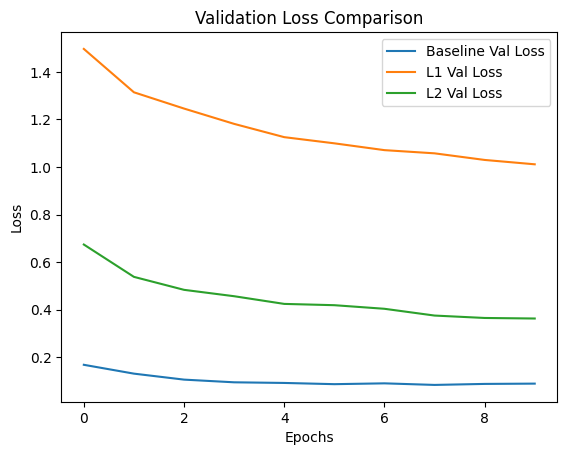

In [8]:
import matplotlib.pyplot as plt

# Plot the training and validation loss for each model
plt.plot(baseline_history.history['val_loss'], label='Baseline Val Loss')
plt.plot(l1_history.history['val_loss'], label='L1 Val Loss')
plt.plot(l2_history.history['val_loss'], label='L2 Val Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

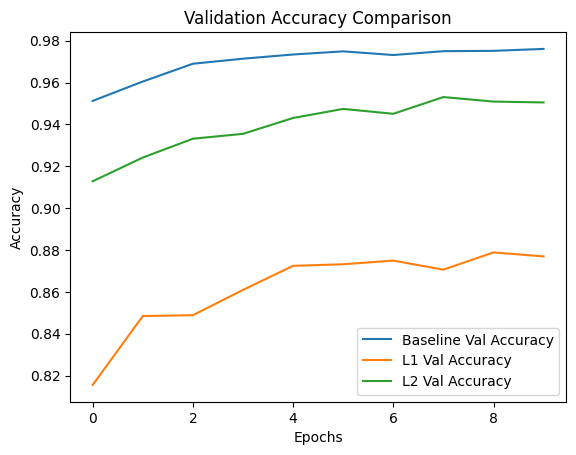

In [9]:
# Plot the training and validation accuracy for each model
plt.plot(baseline_history.history['val_accuracy'], label='Baseline Val Accuracy')
plt.plot(l1_history.history['val_accuracy'], label='L1 Val Accuracy')
plt.plot(l2_history.history['val_accuracy'], label='L2 Val Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

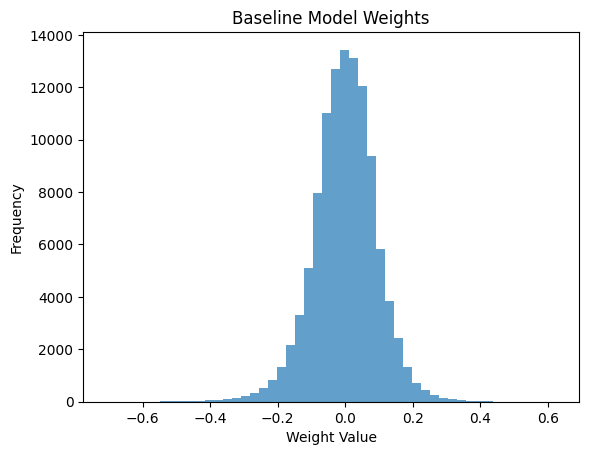

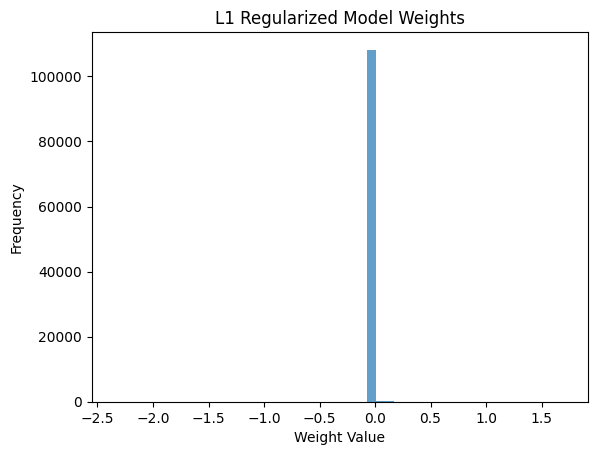

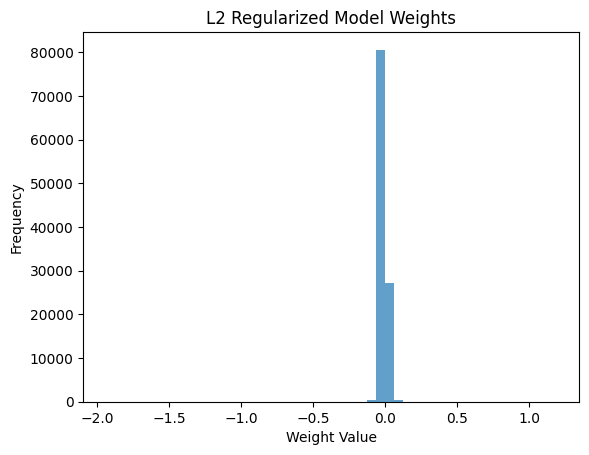

In [10]:
# Function to plot weight distributions
def plot_weight_distribution(model, title):
    weights = []
    for layer in model.layers:
        if isinstance(layer, layers.Dense):
            weights.extend(layer.get_weights()[0].flatten())
    plt.hist(weights, bins=50, alpha=0.7)
    plt.title(title)
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.show()

# Plot weight distributions
plot_weight_distribution(baseline_model, 'Baseline Model Weights')
plot_weight_distribution(l1_model, 'L1 Regularized Model Weights')
plot_weight_distribution(l2_model, 'L2 Regularized Model Weights')